In [1]:
import tensorflow as tf
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
__author__ = "Olivares Castillo José Luis"

tf.__version__

'1.5.0-rc0'

In [2]:
es,na = utils.load_embeddings("w2v3")

In [3]:
na_dummy = na.drop(na.columns[0], axis=1)
na_vectores1 = na_dummy.values.astype(np.float64)

In [4]:
eval_set = utils.get_lexicon("eval")

In [5]:
eval_set.head()

,esp,nah
0,traer,itqui
1,traer,huica
2,traer,huiqui
3,traer,cui
4,adornar,apana


In [6]:
#eval_seed[0].__len__(),eval_seed[1].__len__()

In [7]:
na[na[0]=="chicha"]

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300


In [8]:
eval_es = list(set(eval_set["esp"]))
#eval_es = list(set(eval_seed[2]))

In [9]:
eval_es_index = [int(es[es[0] == palabra].index[0])
                  for palabra in eval_es]

In [10]:
es[es[0] == "pluma"]

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
1452,pluma,0.336302,-0.396595,0.326046,0.070962,-0.0413698,-0.322933,-0.178089,0.239695,-0.188543,...,-0.0141178,-0.436004,-0.499293,0.250767,-0.133303,0.265118,-0.0859756,0.110195,0.0113945,-0.24337


In [11]:
eval_es_index[0]

2052

In [12]:
eval_es_vectores = utils.get_vectors(es,eval_es_index)

In [13]:
eval_es_vectores.shape

(150, 300)

In [14]:
test_vectors = np.array([np.array(es.iloc[indice][1::]).astype(np.float64) for indice in eval_es_index])

In [15]:
sess = tf.Session()

In [16]:
saver = tf.train.import_meta_graph('./models/model1111_gpu/model2250.ckpt.meta')
saver.restore(sess,tf.train.latest_checkpoint('./models/model1111_gpu/'))
#saver = tf.train.import_meta_graph('./models/model_joyce/modeljoyce.ckpt.meta')
#saver.restore(sess, tf.train.latest_checkpoint('./models/model_joyce/'))

INFO:tensorflow:Restoring parameters from ./models/model1111_gpu/model2250.ckpt


In [17]:
graph = tf.get_default_graph()

In [18]:
X = graph.get_tensor_by_name("input/input_es:0")
#y = graph.get_tensor_by_name("input/target_na:0")

In [19]:
[n.name for n in tf.get_default_graph().as_graph_def().node]

['input/input_es',
 'input/target_na',
 'dropout_prob',
 'Const',
 'W1/Initializer/random_uniform/shape',
 'W1/Initializer/random_uniform/min',
 'W1/Initializer/random_uniform/max',
 'W1/Initializer/random_uniform/RandomUniform',
 'W1/Initializer/random_uniform/sub',
 'W1/Initializer/random_uniform/mul',
 'W1/Initializer/random_uniform',
 'W1',
 'W1/IsInitialized/VarIsInitializedOp',
 'W1/Assign',
 'W1/Read/ReadVariableOp',
 'Read/ReadVariableOp',
 'Identity',
 'W1/Regularizer/l2_regularizer/scale',
 'W1/Regularizer/l2_regularizer/L2Loss/ReadVariableOp',
 'W1/Regularizer/l2_regularizer/L2Loss',
 'W1/Regularizer/l2_regularizer',
 'zeros/shape_as_tensor',
 'zeros/Const',
 'zeros',
 'b1',
 'b1/Assign',
 'b1/read',
 'xw_plus_b/ReadVariableOp',
 'xw_plus_b/MatMul',
 'xw_plus_b',
 'fc1',
 'dropout/Shape',
 'dropout/random_uniform/min',
 'dropout/random_uniform/max',
 'dropout/random_uniform/RandomUniform',
 'dropout/random_uniform/sub',
 'dropout/random_uniform/mul',
 'dropout/random_uniform

In [20]:
kprob = graph.get_tensor_by_name("dropout_prob:0")

In [21]:
#output_NN = graph.get_tensor_by_name("output/xw_plus_b:0")#model1937
output_NN = graph.get_tensor_by_name("xw_plus_b_1:0")
#output_NN = graph.get_tensor_by_name("nah_predicted:0")
#output_NN = graph.get_tensor_by_name("dense_2/BiasAdd:0")
#output_NN = graph.get_tensor_by_name("output_1:0")

In [22]:
for v in tf.trainable_variables():
        print(v.name)

W1:0
b1:0
W_na:0
b_na:0


In [23]:
from tensorflow.python import pywrap_tensorflow
    
model_file = "./models/model1111_gpu/model2250.ckpt"
reader = pywrap_tensorflow.NewCheckpointReader(model_file)
var_to_shape_map = reader.get_variable_to_shape_map()
    
for key in sorted(var_to_shape_map):
    print("tensor_name: ", key)
    #print(reader.get_tensor(key))
print(type(reader.get_tensor("b1")))

tensor_name:  W1
tensor_name:  W1/Adagrad
tensor_name:  W_na
tensor_name:  W_na/Adagrad
tensor_name:  b1
tensor_name:  b1/Adagrad
tensor_name:  b_na
tensor_name:  b_na/Adagrad
<class 'numpy.ndarray'>


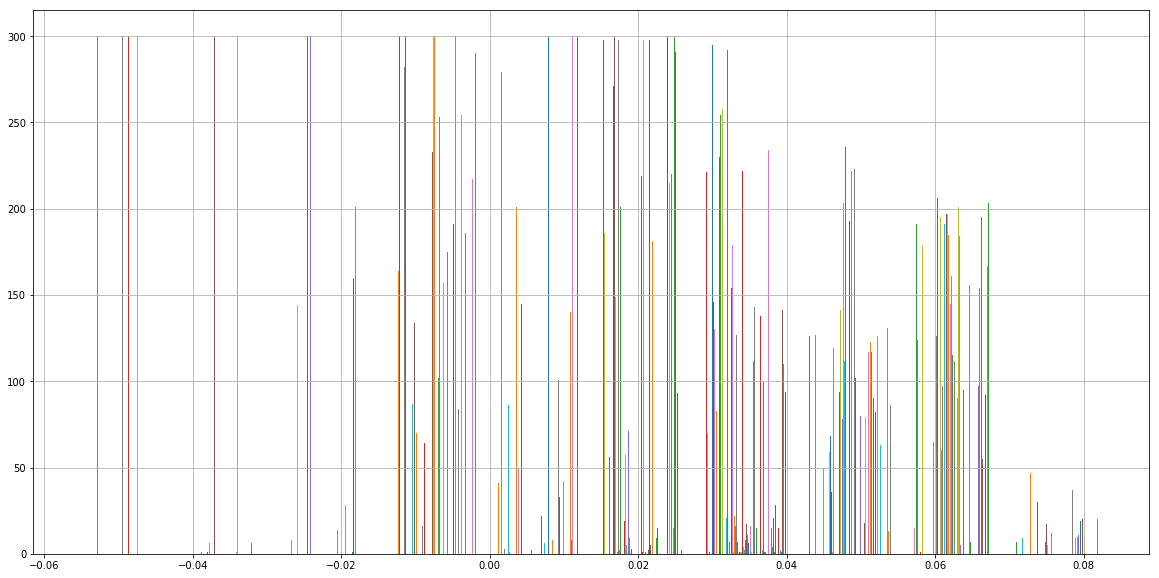

In [24]:
plt.figure(figsize=(20,10))
plt.hist(reader.get_tensor("W1")+reader.get_tensor("b1"))
plt.grid(True)
plt.show()

In [25]:
feed_dict = {X:test_vectors,kprob:1}
pred = sess.run(output_NN,feed_dict)
print (type(pred[0]),pred.shape)

<class 'numpy.ndarray'> (150, 300)


In [26]:
top_10 = [utils.get_top10_closest(pred[_],na_vectores1) for _ in range(pred.shape[0])]
closest = [utils.get_closest_words_to(top_10[_],na) for _ in range(pred.shape[0])]

In [27]:
es[es[0]=="adquisición"].index

Int64Index([4688], dtype='int64')

In [28]:
na[na[0]=="v"].index

Int64Index([702], dtype='int64')

In [29]:
eval_es[6]

'valer'

In [30]:
closest[6]

['petlahua',
 'nemizquia',
 'tzapo',
 'pepeyocyo',
 'galopearoa',
 'presi',
 'rn',
 '2300',
 'chihua',
 'f']

In [31]:
resultados = {palabra_es:top_10_nah for (palabra_es,top_10_nah) in zip(eval_es,closest)}

In [32]:
esp = list(eval_set["esp"].values)
nah = list(eval_set["nah"].values)
pares_eval = list(zip(esp,nah))

In [33]:
from collections import defaultdict
gold = defaultdict(list)
for palabra_es,palabra_na in pares_eval:
    gold[palabra_es].append(palabra_na)
gold = dict(gold)

In [34]:
gold["amado"]

['tlazo', 'tlazohtla']

In [35]:
resultados["amado"]

['petlahua',
 'nemizquia',
 'chala',
 'galopearoa',
 'pepeyocyo',
 'tzapo',
 '2300',
 'segun',
 'presi',
 'rn']

In [36]:
p1 = 0
p5 = 0
p10 = 0
list_esp_eval = (list(resultados.keys()))
hits=list()

not_found = list()

for palabra_gold in list_esp_eval:
    for i in gold[palabra_gold]:
        if i in resultados[palabra_gold]:
            hits.append(resultados[palabra_gold].index(i))
    if hits.__len__() > 0:
        if min(hits) == 0:
            p1 += 1
            p5 += 1
            p10 += 1
        if min(hits) >= 1 and min(hits) <= 5:
            p5 += 1
            p10 += 1
        if min(hits) > 5 and min(hits) <= 10:
            p10 += 1
        print(palabra_gold,min(hits),hits,p1,p5,p10)
    else:
        not_found.append(palabra_gold)
        print(palabra_gold+": NOT FOUND")
   
    hits.clear()

length=list_esp_eval.__len__()
print("\nnot found:", not_found.__len__(), "\nP@1:", p1 / length,
      "\tP@5:", p5 / length, "\tP@10:", p10 / length)
     


admirar: NOT FOUND
amargo: NOT FOUND
barca: NOT FOUND
reinar: NOT FOUND
derecho: NOT FOUND
coger: NOT FOUND
valer: NOT FOUND
sólo: NOT FOUND
ciudad: NOT FOUND
reunir: NOT FOUND
indígena: NOT FOUND
descanso: NOT FOUND
muñeca: NOT FOUND
sueño: NOT FOUND
pedir: NOT FOUND
tanto: NOT FOUND
levantar: NOT FOUND
cierto: NOT FOUND
acabar: NOT FOUND
chiquillo: NOT FOUND
ocurrir: NOT FOUND
rogar: NOT FOUND
naranja: NOT FOUND
teatro: NOT FOUND
galleta: NOT FOUND
quetzal: NOT FOUND
lodo: NOT FOUND
aire: NOT FOUND
pez: NOT FOUND
cultura: NOT FOUND
pasar: NOT FOUND
suceder: NOT FOUND
llanura: NOT FOUND
derribar: NOT FOUND
prestar: NOT FOUND
echar: NOT FOUND
rostro: NOT FOUND
escupir: NOT FOUND
diverso: NOT FOUND
alegrar: NOT FOUND
brazo: NOT FOUND
itacates: NOT FOUND
llano: NOT FOUND
izquierda: NOT FOUND
saltar: NOT FOUND
mesero: NOT FOUND
molcajete: NOT FOUND
centenario 8 [8] 0 0 1
coyote: NOT FOUND
olvidar: NOT FOUND
yo: NOT FOUND
unir: NOT FOUND
establecer: NOT FOUND
vaca: NOT FOUND
puramente: NOT

In [37]:
len(list(resultados.keys())),not_found.__len__(),not_found.__len__()/len(list(resultados.keys()))

(150, 148, 0.9866666666666667)

In [38]:
resultados_gold = dict()
for k,v in resultados.items():
    resultados_gold[k] = {"GOLD":gold[k],"RESULTS":v}

# Palabras no encontradas

In [39]:
for res in not_found:
    print(res.upper()+":","\nGOLD",resultados_gold[res]["GOLD"],
          "\nRESULTADOS",resultados_gold[res]["RESULTS"],end="\n"*2)

ADMIRAR: 
GOLD ['mahuizo', 'iglesia', 'tlamahuiz'] 
RESULTADOS ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'chihua', 'rn', 'presi', 'f', 'otlazohcama', 'tepon']

AMARGO: 
GOLD ['chichi'] 
RESULTADOS ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'chala', 'galopearoa', '2300', 'presi', 'rn', 'chihua']

BARCA: 
GOLD ['acalli'] 
RESULTADOS ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'rn', 'presi', 'chihua', 'f', 'tepon', 'otlazohcama']

REINAR: 
GOLD ['motlahtocatlalli', 'toca'] 
RESULTADOS ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'rn', 'presi', 'chihua', 'f', 'tepon', 'otlazohcama']

DERECHO: 
GOLD ['melahua', 'melauh', 'yec'] 
RESULTADOS ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'galopearoa', 'presi', 'rn', '2300', 'chihua', 'f']

COGER: 
GOLD ['ana', 'cana', 'cui'] 
RESULTADOS ['huah', 'taci', 'petlahua', 'federal', 'icnin', 'barrio', 'ttiti', 'cholo', 'otlazohcama', 'tzapo']

VALER: 
GOLD ['patio'] 
RESULTADOS ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'galo

In [40]:
resultados_gold["amado"]

{'GOLD': ['tlazo', 'tlazohtla'],
 'RESULTS': ['petlahua',
  'nemizquia',
  'chala',
  'galopearoa',
  'pepeyocyo',
  'tzapo',
  '2300',
  'segun',
  'presi',
  'rn']}

In [41]:
resultados_gold["nido"]

{'GOLD': ['tapazolli', 'tapazol', 'pa', 'zol'],
 'RESULTS': ['petlahua',
  'chala',
  'nemizquia',
  'galopearoa',
  'segun',
  '2300',
  'yepazot',
  'pepeyocyo',
  'pouhilil',
  'tzapo']}

# Resultados - Gold

In [42]:
for k,v in resultados_gold.items():
    print("Palabra:",k.upper(),"\nGOLD:",v["GOLD"],"\nRESULTADOS:",
          v["RESULTS"],end="\n"*2)

Palabra: ADMIRAR 
GOLD: ['mahuizo', 'iglesia', 'tlamahuiz'] 
RESULTADOS: ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'chihua', 'rn', 'presi', 'f', 'otlazohcama', 'tepon']

Palabra: AMARGO 
GOLD: ['chichi'] 
RESULTADOS: ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'chala', 'galopearoa', '2300', 'presi', 'rn', 'chihua']

Palabra: BARCA 
GOLD: ['acalli'] 
RESULTADOS: ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'rn', 'presi', 'chihua', 'f', 'tepon', 'otlazohcama']

Palabra: REINAR 
GOLD: ['motlahtocatlalli', 'toca'] 
RESULTADOS: ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'rn', 'presi', 'chihua', 'f', 'tepon', 'otlazohcama']

Palabra: DERECHO 
GOLD: ['melahua', 'melauh', 'yec'] 
RESULTADOS: ['petlahua', 'nemizquia', 'tzapo', 'pepeyocyo', 'galopearoa', 'presi', 'rn', '2300', 'chihua', 'f']

Palabra: COGER 
GOLD: ['ana', 'cana', 'cui'] 
RESULTADOS: ['huah', 'taci', 'petlahua', 'federal', 'icnin', 'barrio', 'ttiti', 'cholo', 'otlazohcama', 'tzapo']

Palabra: VALER 
GOLD: ['pati